# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
    
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(train['features'])

# TODO: Number of validation examples
n_validation = len(valid['features'])

# TODO: Number of testing examples.
n_test = len(test['features'])

print(test.keys())
#print(test['features'][0].shape)
# TODO: What's the shape of an traffic sign image?
image_shape = test['features'][0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43 # from notes

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

dict_keys(['features', 'sizes', 'coords', 'labels'])
Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Sample images from training set: 


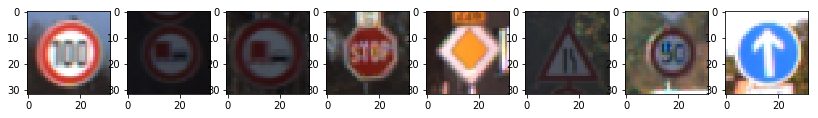

Checking number of elements in each class:
[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


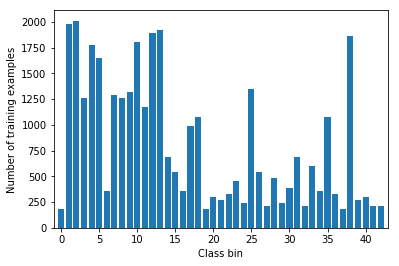

In [45]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# randomly choose 10 images and show
indices = random.sample(range(1, 34799), 10)

#show corresponding images on the same axis. (later show graysclae of those)
# helpful link:
# https://stackoverflow.com/questions/46615554/how-to-display-multiple-images-in-one-figure-correctly

print('Sample images from training set: ')
fig=plt.figure(figsize=(14, 14))
columns = 8
rows = 1
sample_images = []
for i in range(8):
    img = X_train[indices[i]]
    sample_images.append(img)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show()

print('Checking number of elements in each class:')
counts = [0]*43
for i in y_train:
    counts[i] += 1
print(counts)

# plotting a bargraph
import matplotlib.pyplot as plt

plt.bar( np.arange( 43 ), counts, align='center' )
plt.xlabel('Class bin')
plt.ylabel('Number of training examples')
plt.xlim([-1, 43])
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [67]:
from sklearn.utils import shuffle
import numpy as np
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.


def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    gray = gray.reshape((32, 32, 1))
    return gray


shape_gray_train = (34799, 32, 32, 1)
shape_gray_validation = (4410, 32, 32, 1)
shape_gray_test = (12630, 32, 32, 1)
X_train_gray = np.ndarray(shape_gray_train)
X_validation_gray = np.ndarray(shape_gray_validation)
X_test_gray = np.ndarray(shape_gray_test)

# convert to gray and normalize
print(X_train[2].shape)
print(X_train_gray[2].shape)

print('converting train data to gray')
for i in range(34799):
    X_train_gray[i] = rgb2gray(X_train[i])
    X_train_gray[i] = (X_train_gray[i] - 128) / 128


print('converting validation data to gray')
for i in range(4410):
    X_validation_gray[i] = rgb2gray(X_validation[i])
    X_validation_gray[i] = (X_validation_gray[i] - 128) / 128
    

print(X_test.shape)
for i in range(12630):
    X_test_gray[i] = rgb2gray(X_test[i])
    X_test_gray[i] = (X_test_gray[i] - 128) / 128
    


# shuffle training data:
#X_train, y_train = shuffle(X_train, y_train)
print('Done preprocessing dataset')


(32, 32, 3)
(32, 32, 1)
converting train data to gray
converting validation data to gray
(12630, 32, 32, 3)
Done preprocessing dataset


### Model Architecture

In [5]:
# setup tensor flow
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128 #128



In [6]:
# helper functions:
def conv2d(input, filter_hight, filter_width, in_depth, out_depth, stride, padding, mu, sigma):
    # Filter (weights and bias)
    filter_weights = tf.Variable(tf.truncated_normal(shape=(filter_hight,filter_width,in_depth,out_depth), mean=mu,stddev=sigma))
    filter_bias = tf.Variable(tf.zeros(out_depth))
    strides = [1, stride, stride, 1]
    #padding = 'VALID'
    conv_layer = tf.nn.conv2d(input, filter_weights, strides, padding) #+ F_b
    return tf.nn.bias_add(conv_layer, filter_bias)

def max_pool(input, filter_hight, filter_width, stride, padding):
    filter_shape = [1, filter_hight, filter_width, 1]
    strides = [1, stride, stride, 1]
    #padding = 'VALID'
    return tf.nn.max_pool(input, filter_shape, strides, padding)

def fully_connected_nn(input, n_input, n_out, mu, sigma):
    weights = tf.Variable(tf.truncated_normal(shape=(n_input,n_out), mean=mu, stddev=sigma))
    bias = tf.Variable(tf.zeros([n_out]))
    hidden_layer = tf.add(tf.matmul(input, weights), bias)
    return hidden_layer


In [7]:
# LeNet architecture:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    keep_prob = 0.5
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv_layer = conv2d(x, 5, 5, 1, 6, 1, 'VALID', mu, sigma)

    # TODO: Activation.
    conv_layer = tf.tanh(conv_layer)
    

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv_layer = max_pool(conv_layer, 2, 2, 2, 'VALID')
    

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv_layer = conv2d(conv_layer, 5, 5, 6, 20, 1, 'VALID', mu, sigma)
    
    # TODO: Activation.
    conv_layer = tf.tanh(conv_layer)
    #conv_layer = tf.nn.dropout(conv_layer, keep_prob)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv_layer = max_pool(conv_layer, 2, 2, 2, 'VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    flat_layer = tf.contrib.layers.flatten(conv_layer)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    hidden_layer = fully_connected_nn(flat_layer, 500, 200, mu, sigma)
    
    
    # TODO: Activation.
    hidden_layer = tf.tanh(hidden_layer)
    # dropout
    #hidden_layer = tf.nn.dropout(hidden_layer, keep_prob)
    

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    hidden_layer = fully_connected_nn(hidden_layer, 200, 100, mu, sigma)
    
    
    # TODO: Activation.
    hidden_layer = tf.sigmoid(hidden_layer)
    #hidden_layer = tf.nn.dropout(hidden_layer, keep_prob)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = fully_connected_nn(hidden_layer, 100, 43, mu, sigma)
    
    return logits

In [8]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [9]:
rate = 0.0015#0.0015

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [10]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
#config=tf.ConfigProto(log_device_placement=True)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_gray, y_train = shuffle(X_train_gray, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_gray[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation_gray, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.841

EPOCH 2 ...
Validation Accuracy = 0.927

EPOCH 3 ...
Validation Accuracy = 0.941

EPOCH 4 ...
Validation Accuracy = 0.945

EPOCH 5 ...
Validation Accuracy = 0.950

EPOCH 6 ...
Validation Accuracy = 0.953

EPOCH 7 ...
Validation Accuracy = 0.956

EPOCH 8 ...
Validation Accuracy = 0.952

EPOCH 9 ...
Validation Accuracy = 0.954

EPOCH 10 ...
Validation Accuracy = 0.955

Model saved


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

4
web\60_kmh.jpg


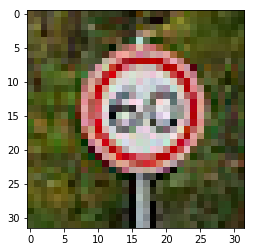

(32, 32, 3)
web\road_work.jpg


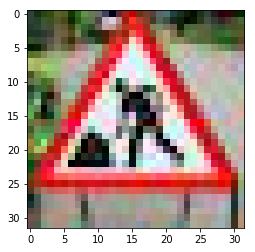

(32, 32, 3)
web\stop_sign.jpg


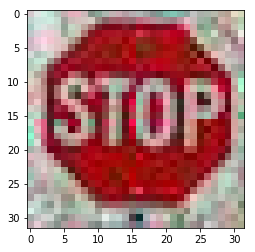

(32, 32, 3)
web\yield_sign.jpg


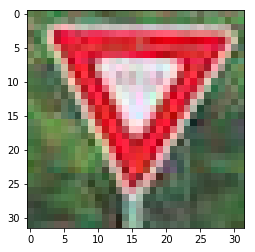

(32, 32, 3)


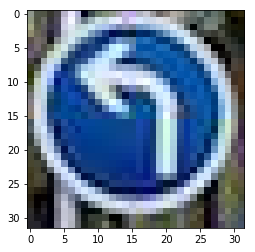

(32, 32, 1)


In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# Read new images
# credit to https://github.com/mvirgo for images with proper scale
import glob
import matplotlib.image as mpimg
new_images_names = glob.glob('web/*.jpg')
new_images = []   # list of images, not filenames
print(len(new_images_names))

for i in new_images_names:
    new_image = mpimg.imread(i)
    new_images.append(new_image)
    print(i)
    plt.imshow(new_image)
    plt.show()
    print(new_image.shape)

new_image = mpimg.imread('web/left_turn.jpeg')
new_images.append(new_image)
plt.imshow(new_image)
plt.show()
# preprocess images: (grayscale and normalize)
preprocessed_images = []
for img in new_images:
    tmp = rgb2gray(img)
    preprocessed_images.append((tmp - 128) / 128)
print(preprocessed_images[0].shape)


### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from .\lenet
image:  0


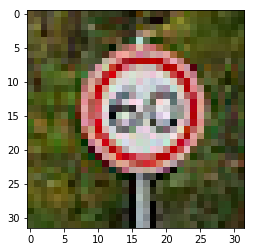

top probabilites are:
[ 2.64223409  1.8279686   1.40934551  1.17301047  1.01590931]
for classes:
[ 9 13 37 26 15]
---------
image:  1


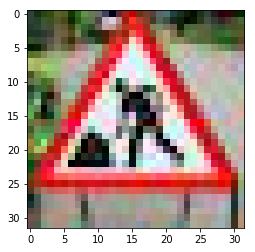

top probabilites are:
[ 6.84057236  3.39951944  2.37470984  0.97911876  0.14601442]
for classes:
[18 40  1 38  0]
---------
image:  2


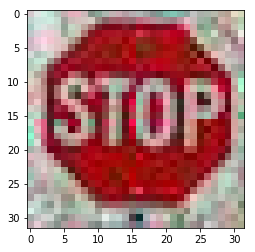

top probabilites are:
[ 4.39840889  2.10487223  1.30173969  0.58724171 -0.12434682]
for classes:
[14 17  0 34 30]
---------
image:  3


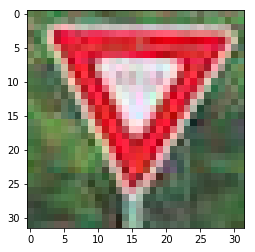

top probabilites are:
[ 7.33394098  1.61226892  1.07561266  0.85740161  0.84701222]
for classes:
[13 35 12  3  2]
---------
image:  4


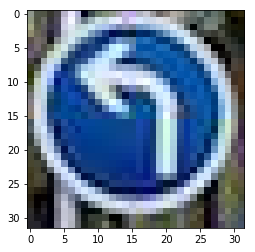

top probabilites are:
[ 4.8017993   2.71353531  1.6284827   0.45974964  0.17580897]
for classes:
[38 34 14 12 17]
---------


In [13]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    new_labels = sess.run(logits, feed_dict={x: preprocessed_images})
    top_five   = sess.run(tf.nn.top_k(new_labels,k=5,sorted=True))
    for i in range(len(preprocessed_images)):
        print('image: ', i)
        plt.imshow(new_images[i])
        plt.show()
        print('top probabilites are:')
        print(top_five[0][i])
        print('for classes:')
        print(top_five[1][i])
        print('---------')

### Analyze Performance

In [14]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_gray, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.930


### Output Top 5 Softmax Probabilities For Each Image Found on the Web (included in previous cells)

Included in previous cells

In [15]:
### included with previous section

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.